In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling as profile   # To check data distributions and correlations
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats

from pylab import rcParams

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [2]:
RawData=pd.read_csv("C:/Users/spati/Documents/WastageAnalysis.csv")

In [3]:
## Lets Check Shape of datasets 

print('Shape of Train data :',RawData.shape)

Shape of Train data : (99969, 34)


In [4]:
RawData.head(5)

,CLM_ID,DTL_LN_NBR,FDOS_CLM,LDOS_CLM,UNITS,POS,CLM_TYP,CPT_PROC_CD,DX1,DX2,...,Last_Name,BIlling_Pro_Name,Service_Pro_Name,GroupSize,CCI_Comment,CDB_Information,Medicare_Effective_Date,Flag,RetiredInd,ClaimLabel_New
0,ZZZab24570,4,2/7/2024,2/7/2024,1,72.0,3,87880.0,J0100,M7910,...,PLE,NaN,RESIMP,50,Medicare is Primary due to Retired,No-Member has no Medicare,1/1/2024,Correct,0,NaN
1,ABCM246227,4,2/7/2024,2/7/2024,1,11.0,3,NaN,M5450,Z23,...,INS,NaN,UPSAIN,50,Medicare is Primary due to Retired,No-Member has no Medicare,1/1/2024,Correct,1,NaN
2,TDCF246537,4,2/13/2024,2/13/2024,1,11.0,3,NaN,Z23,I10,...,ACK,NaN,RPUCHE,19,Medicare is Primary due to Retired,Yes-Member has Medicare,1/1/2024,Correct,0,NaN
3,MTDM246550,4,2/9/2024,2/9/2024,1,11.0,3,97140.0,M25511,NaN,...,ina,NaN,LPIVY,50,Medicare is Primary due to Retired,No-Member has no Medicare,1/1/2024,Correct,0,NaN
4,ZZZab24656,4,2/12/2024,2/12/2024,1,11.0,3,90461.0,Z00129,Z23,...,ord,NaN,DSCHIL,16,Medicare is secondary since groupsize > 20,No-Member has no Medicare,11/1/2023,Correct,0,NaN


In [5]:
RawData.isna().sum()

CLM_ID                         0
DTL_LN_NBR                     0
FDOS_CLM                       0
LDOS_CLM                       0
UNITS                          0
POS                           54
CLM_TYP                        0
CPT_PROC_CD                17139
DX1                            1
DX2                        30431
DX3                        49993
DX4                        64727
AMT_BIL                        0
AMT_DISC                       0
AMT_CNTRCT                   111
AMT_PD                       515
AMT_ALLOWED                  111
PAID_DT                        0
PROV_BIL_TIN                   0
PROV_SVC_PAR_STAT              0
MBR_REL_CD                   395
Member AGE                     0
ADJUD_STATUS                   0
First_Name                   515
Last_Name                    137
BIlling_Pro_Name           50183
Service_Pro_Name             185
GroupSize                      0
CCI_Comment                    0
CDB_Information                0
Medicare_E

In [6]:
RawData.dtypes

CLM_ID                      object
DTL_LN_NBR                   int64
FDOS_CLM                    object
LDOS_CLM                    object
UNITS                        int64
POS                        float64
CLM_TYP                      int64
CPT_PROC_CD                float64
DX1                         object
DX2                         object
DX3                         object
DX4                         object
AMT_BIL                    float64
AMT_DISC                   float64
AMT_CNTRCT                 float64
AMT_PD                     float64
AMT_ALLOWED                float64
PAID_DT                     object
PROV_BIL_TIN                object
PROV_SVC_PAR_STAT           object
MBR_REL_CD                  object
Member AGE                   int64
ADJUD_STATUS                object
First_Name                  object
Last_Name                   object
BIlling_Pro_Name            object
Service_Pro_Name            object
GroupSize                    int64
CCI_Comment         

Descriptive Statistics:
                POS        AMT_BIL    AMT_CNTRCT        AMT_PD   AMT_ALLOWED  \
count  99969.000000   99969.000000  99969.000000  99969.000000  99969.000000   
mean      24.486431     289.151875     89.395249     60.172350     80.855962   
std       26.151891    1746.082211    722.447771    580.089559    593.585486   
min        0.000000  -56793.000000 -36590.750000 -36590.750000 -36590.750000   
25%       11.000000      32.550000      0.000000      0.000000      0.000000   
50%       11.000000     106.000000     12.160000      0.000000     13.030000   
75%       22.000000     250.000000     92.000000     48.910000     87.180000   
max       99.000000  194000.000000  95798.700000  95798.700000  95798.700000   

         Member AGE     GroupSize  
count  99969.000000  99969.000000  
mean      55.758375     27.611560  
std       20.689375     13.596197  
min        0.000000     16.000000  
25%       43.000000     19.000000  
50%       65.000000     19.000000  
75%

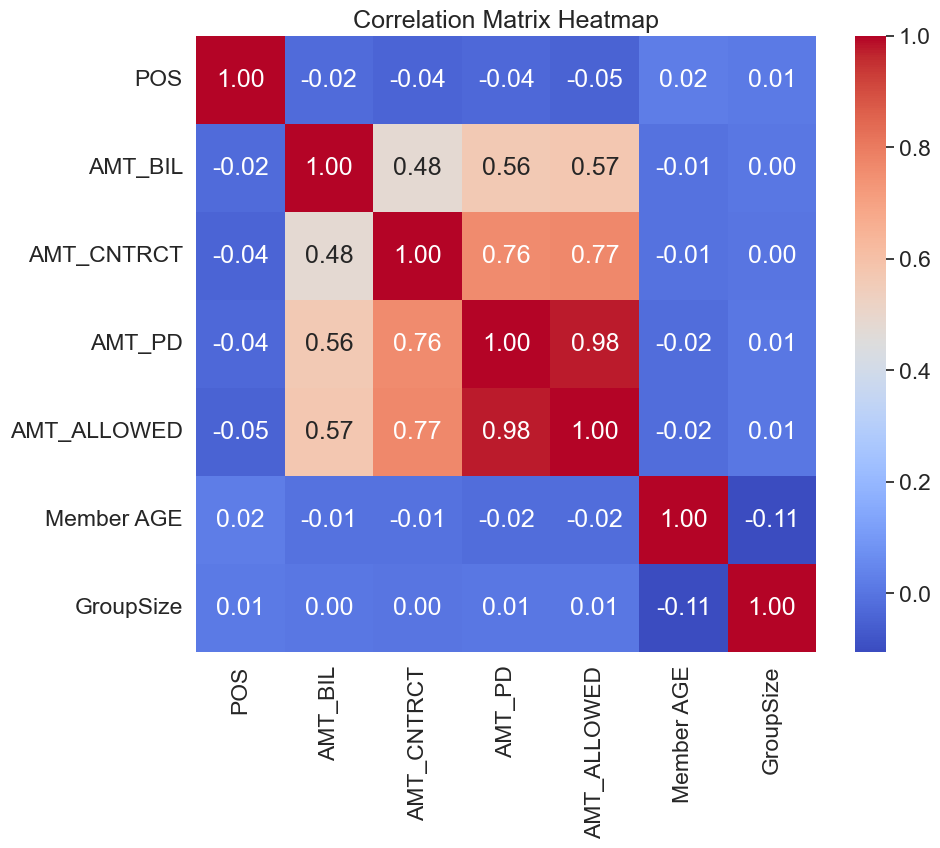

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'RawData' is your DataFrame
# List of columns to exclude
exclude_columns = ['CLM_ID','DTL_LN_NBR','FDOS_CLM','LDOS_CLM','UNITS','CLM_TYP','CPT_PROC_CD','DX1','DX2','DX3','DX4',
                  'AMT_DISC','PAID_DT','PROV_BIL_TIN','PROV_SVC_PAR_STAT','MBR_REL_CD',
                 'ADJUD_STATUS','First_Name','Last_Name','BIlling_Pro_Name','Service_Pro_Name',
                 'CCI_Comment','CDB_Information','Medicare_Effective_Date','Flag','RetiredInd','ClaimLabel_New']


# Create a new DataFrame excluding the specified columns
filtered_data = RawData.drop(columns=exclude_columns)

# Convert all columns to numeric, coercing non-numeric values to NaN
for col in filtered_data.columns:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Fill NaN values with a suitable value (e.g., 0 or the column mean)
# Here, we fill with 0
filtered_data = filtered_data.fillna(0)


# Generate Descriptive Statistics Table
descriptive_stats = filtered_data.describe()

# Display Descriptive Statistics Table
print("Descriptive Statistics:")
print(descriptive_stats)

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv')

# Generate Correlation Matrix
correlation_matrix = filtered_data.corr()

# Display Correlation Matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')

# Visualize the Correlation Matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [8]:
filtered_data = RawData[RawData['Flag'] != 'NULL']
grouped_data = filtered_data.groupby(['DX1', 'Flag']).agg({'AMT_PD': ['count', 'sum']})
grouped_data.columns = ['n', 'AMT_PD']
grouped_data.reset_index(inplace=True)

In [9]:
sorted_data = grouped_data.sort_values(by='n', ascending=False)
print(sorted_data)

          DX1     Flag     n     AMT_PD
6941    Z0000  Correct  5094  172494.51
2326      I10  Correct  2505   47204.40
6948   Z00129  Correct  1336   98567.38
954      E119  Correct  1121   22608.47
7085      Z23  Correct  1065   58120.16
...       ...      ...   ...        ...
4563  M84451A  Correct     0       0.00
5962  S129XXA  Correct     0       0.00
5047    O1002  Correct     0       0.00
2877    J3801  Correct     0       0.00
4384   M71161  Correct     0       0.00

[7524 rows x 4 columns]


In [10]:
grouped_data.reset_index(inplace=True)

In [11]:
# Group data by 'Flag' and calculate count and sum of 'PaidAmt'
grouped_data = RawData.groupby('Flag').agg({'AMT_PD': ['count', 'sum']})
grouped_data.columns = ['VolumeCount', 'Paid Amount']
grouped_data.reset_index(inplace=True)

# Print the results
print(grouped_data)

         Flag  VolumeCount  Paid Amount
0     Correct        86590   5381237.18
1  In-Correct        12864    634132.50


In [12]:
RawData.head(5)

,CLM_ID,DTL_LN_NBR,FDOS_CLM,LDOS_CLM,UNITS,POS,CLM_TYP,CPT_PROC_CD,DX1,DX2,...,Last_Name,BIlling_Pro_Name,Service_Pro_Name,GroupSize,CCI_Comment,CDB_Information,Medicare_Effective_Date,Flag,RetiredInd,ClaimLabel_New
0,ZZZab24570,4,2/7/2024,2/7/2024,1,72.0,3,87880.0,J0100,M7910,...,PLE,NaN,RESIMP,50,Medicare is Primary due to Retired,No-Member has no Medicare,1/1/2024,Correct,0,NaN
1,ABCM246227,4,2/7/2024,2/7/2024,1,11.0,3,NaN,M5450,Z23,...,INS,NaN,UPSAIN,50,Medicare is Primary due to Retired,No-Member has no Medicare,1/1/2024,Correct,1,NaN
2,TDCF246537,4,2/13/2024,2/13/2024,1,11.0,3,NaN,Z23,I10,...,ACK,NaN,RPUCHE,19,Medicare is Primary due to Retired,Yes-Member has Medicare,1/1/2024,Correct,0,NaN
3,MTDM246550,4,2/9/2024,2/9/2024,1,11.0,3,97140.0,M25511,NaN,...,ina,NaN,LPIVY,50,Medicare is Primary due to Retired,No-Member has no Medicare,1/1/2024,Correct,0,NaN
4,ZZZab24656,4,2/12/2024,2/12/2024,1,11.0,3,90461.0,Z00129,Z23,...,ord,NaN,DSCHIL,16,Medicare is secondary since groupsize > 20,No-Member has no Medicare,11/1/2023,Correct,0,NaN


In [13]:
X = RawData.drop(columns=['CLM_ID','DTL_LN_NBR','FDOS_CLM','LDOS_CLM','UNITS','CLM_TYP','CPT_PROC_CD','DX1','DX2','DX3','DX4','AMT_BIL',
                          'AMT_CNTRCT','AMT_PD','AMT_ALLOWED','AMT_DISC','PAID_DT','PROV_BIL_TIN','PROV_SVC_PAR_STAT','MBR_REL_CD',
                 'ADJUD_STATUS','First_Name','Last_Name','BIlling_Pro_Name','Service_Pro_Name','Medicare_Effective_Date','Flag',
                 'ClaimLabel_New'], axis=1)   # Features
y = RawData['Flag']  # Target

In [14]:
X.head(5)

,POS,Member AGE,GroupSize,CCI_Comment,CDB_Information,RetiredInd
0,72.0,64,50,Medicare is Primary due to Retired,No-Member has no Medicare,0
1,11.0,68,50,Medicare is Primary due to Retired,No-Member has no Medicare,1
2,11.0,60,19,Medicare is Primary due to Retired,Yes-Member has Medicare,0
3,11.0,59,50,Medicare is Primary due to Retired,No-Member has no Medicare,0
4,11.0,0,16,Medicare is secondary since groupsize > 20,No-Member has no Medicare,0


Class Index - Class Name
0 - Correct
1 - In-Correct
Decision Tree Classifier - Test Set:
              precision    recall  f1-score   support

     Correct       0.99      0.96      0.98     17394
  In-Correct       0.78      0.96      0.86      2600

    accuracy                           0.96     19994
   macro avg       0.89      0.96      0.92     19994
weighted avg       0.97      0.96      0.96     19994

Accuracy: 0.9593378013404021
Confusion Matrix:
[[16684   710]
 [  103  2497]]
Decision Tree Classifier - Validation Set:
              precision    recall  f1-score   support

     Correct       0.99      0.96      0.98     17409
  In-Correct       0.79      0.95      0.86      2585

    accuracy                           0.96     19994
   macro avg       0.89      0.96      0.92     19994
weighted avg       0.97      0.96      0.96     19994

Accuracy: 0.9611883565069521
Confusion Matrix:
[[16751   658]
 [  118  2467]]
Random Forest Classifier - Test Set:
              precisi

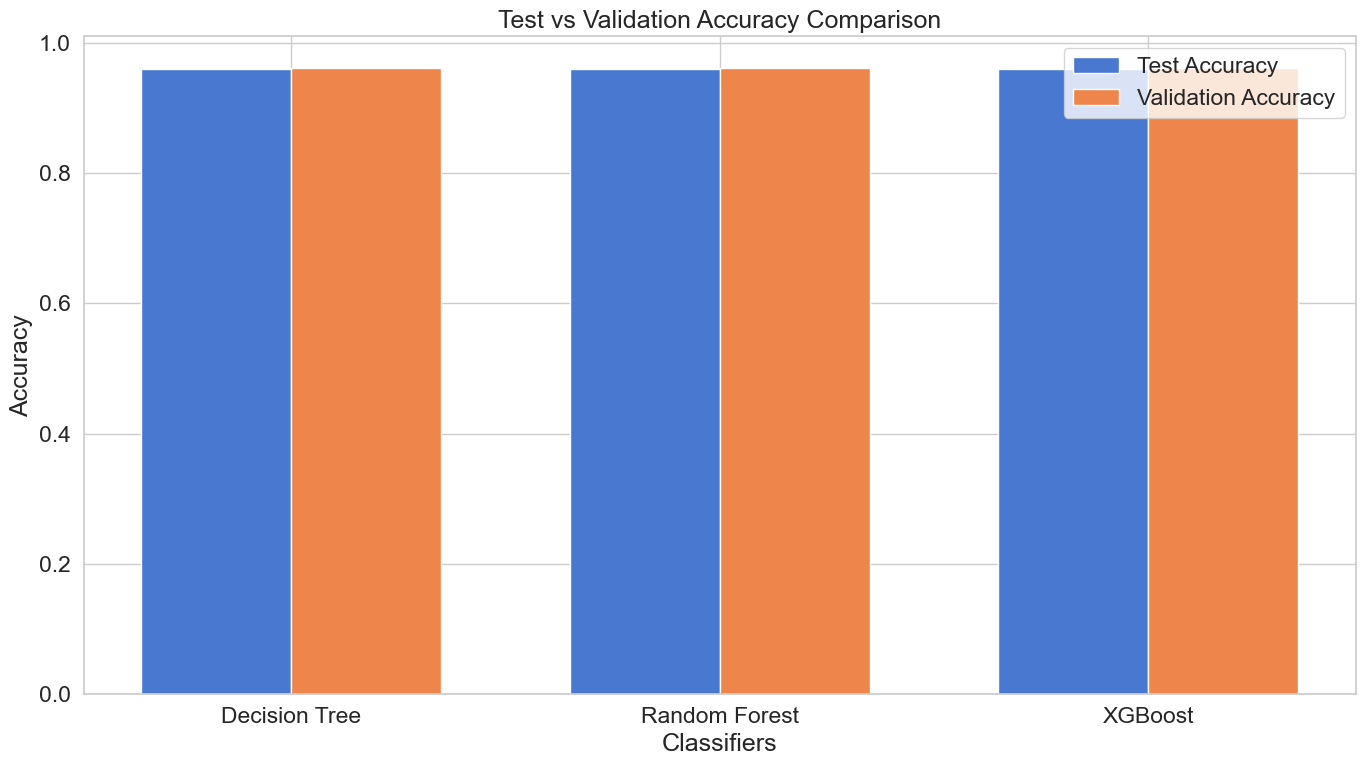

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Encode the categorical features
label_encoder = LabelEncoder()
categorical_columns = ['POS', 'CCI_Comment', 'CDB_Information', 'RetiredInd']
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode the target variable
y_encoded = label_encoder.fit_transform(RawData['Flag'])
class_names = label_encoder.classes_.astype(str)  # Ensure class names are strings

# Print label names
print("Class Index - Class Name")
for index, name in enumerate(class_names):
    print(f"{index} - {name}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Function to plot accuracy comparison
def plot_accuracy_comparison(accuracies_test, accuracies_val):
    # Plot comparison
    plt.figure()
    index = np.arange(len(classifiers))
    bar_width = 0.35
    plt.bar(index, accuracies_test, bar_width, label='Test Accuracy')
    plt.bar(index + bar_width, accuracies_val, bar_width, label='Validation Accuracy')
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Test vs Validation Accuracy Comparison')
    plt.xticks(index + bar_width / 2, classifiers.keys())
    plt.legend()
    plt.tight_layout()
    plt.show()

# Train and evaluate each classifier
accuracies_test = []
accuracies_val = []
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test)
    # Make predictions on the validation set
    y_pred_val = classifier.predict(X_val)
    
    # Calculate and print metrics for the test set
    print(f"{name} Classifier - Test Set:")
    print(classification_report(y_test, y_pred_test, target_names=class_names))
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    accuracies_test.append(accuracy_score(y_test, y_pred_test))
    
    # Calculate and print metrics for the validation set
    print(f"{name} Classifier - Validation Set:")
    print(classification_report(y_val, y_pred_val, target_names=class_names))
    print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred_val))
    accuracies_val.append(accuracy_score(y_val, y_pred_val))

# Plot the accuracy comparison graph
plot_accuracy_comparison(accuracies_test, accuracies_val)


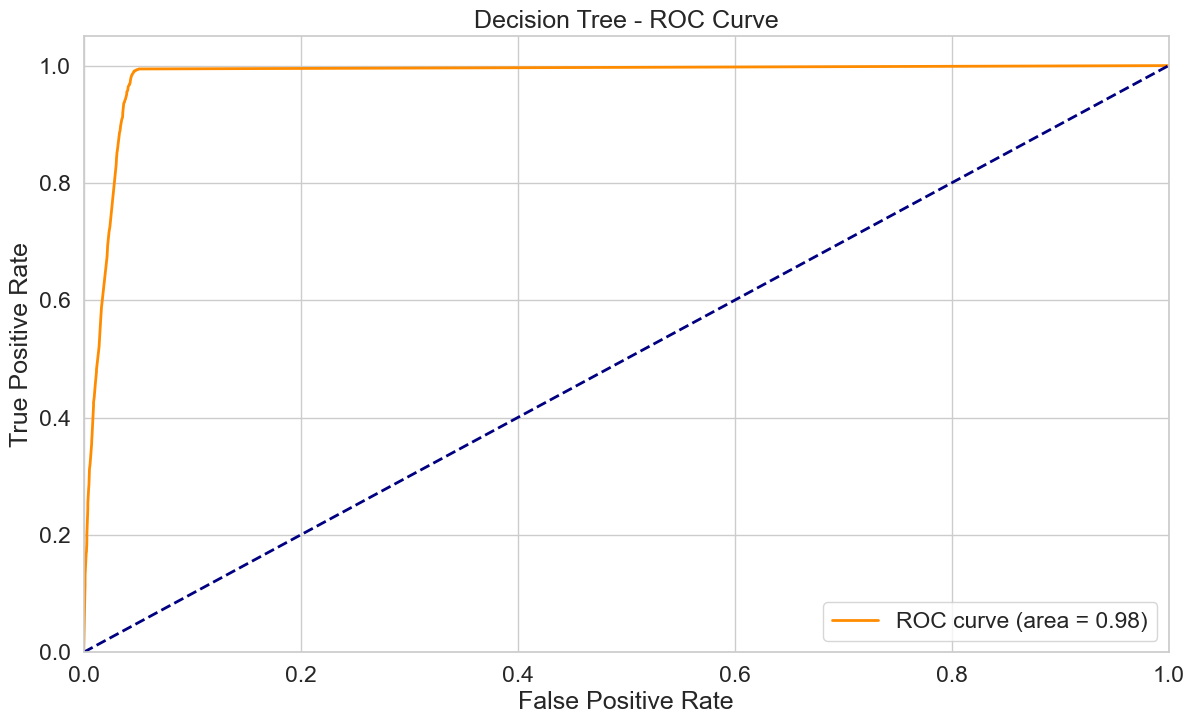

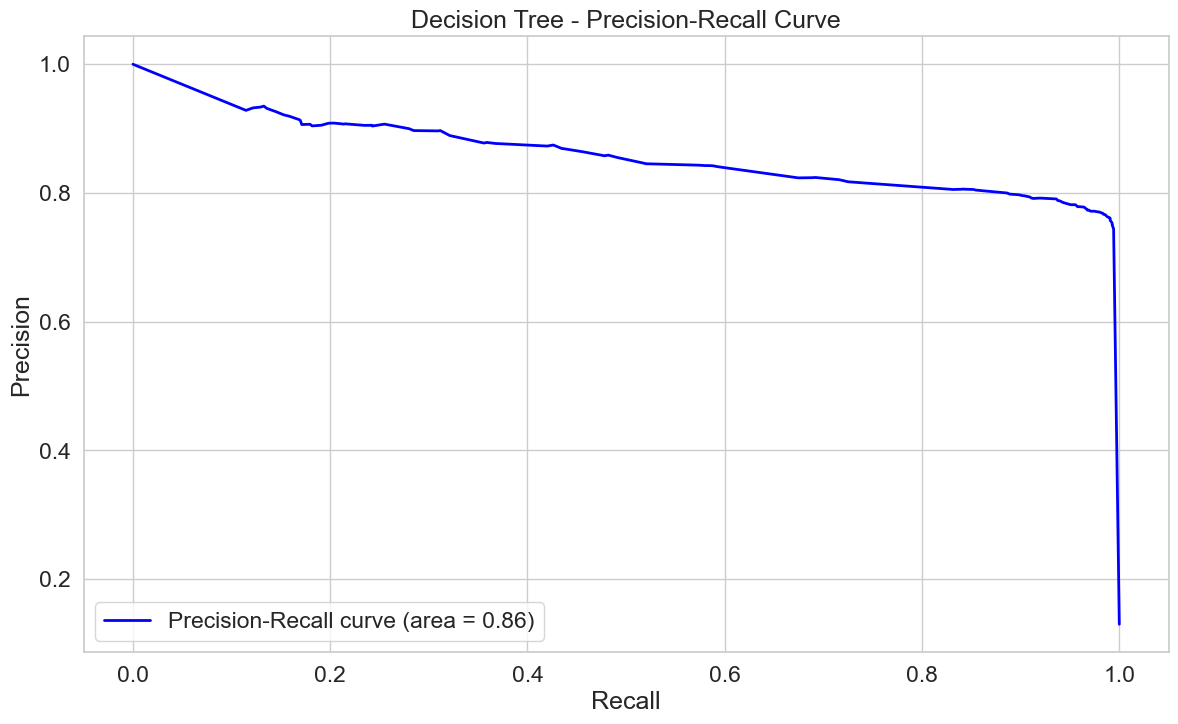

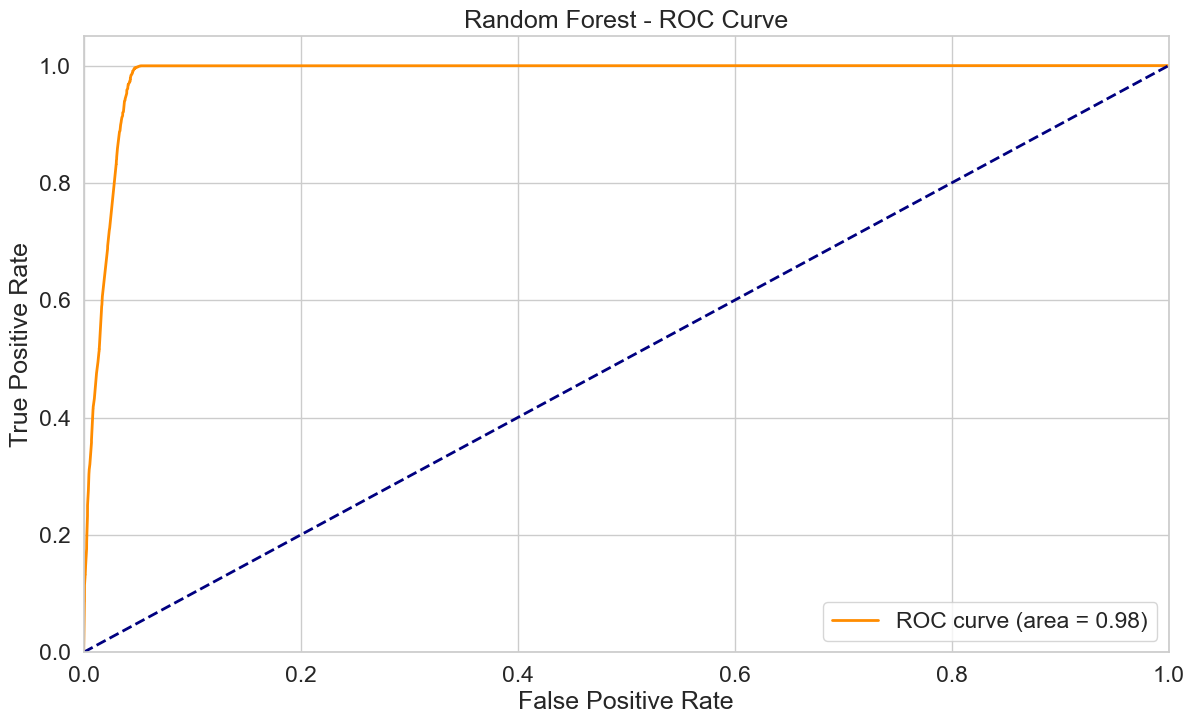

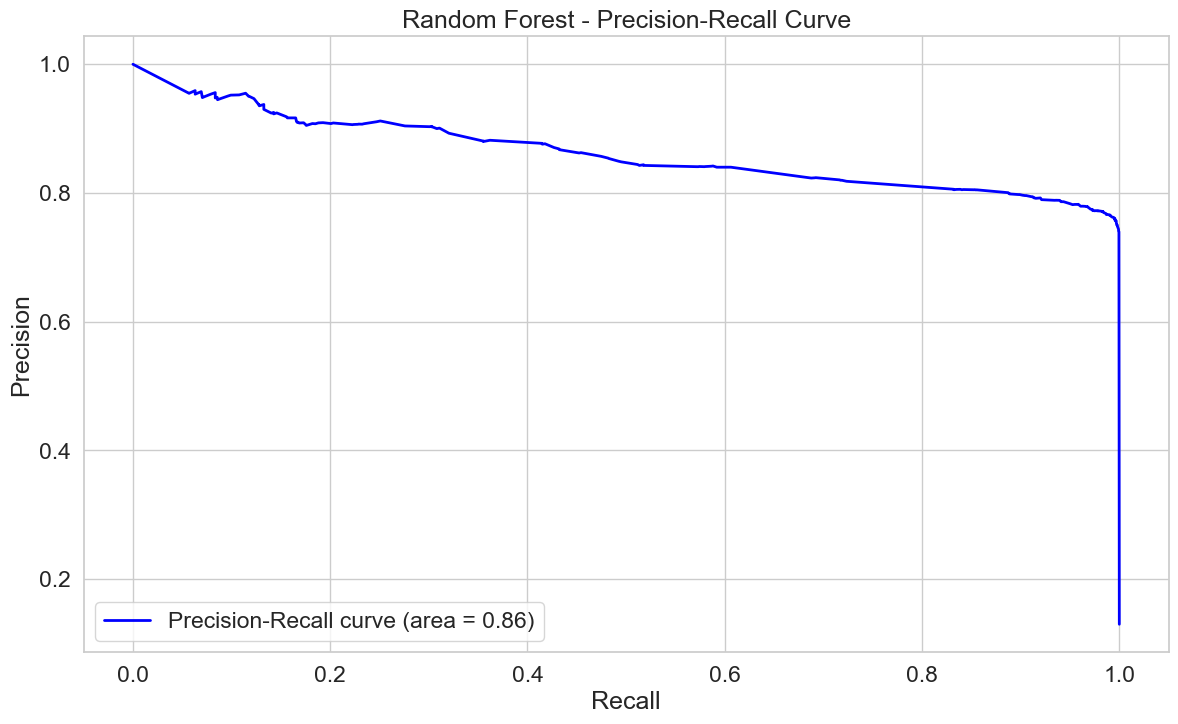

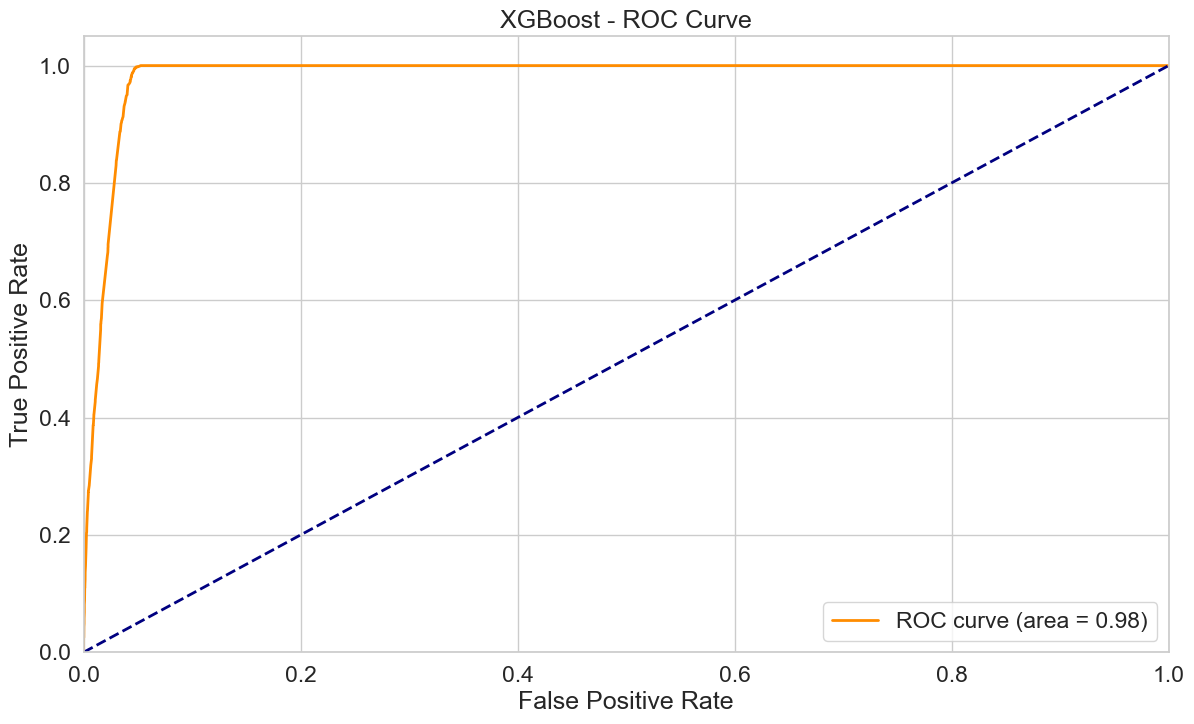

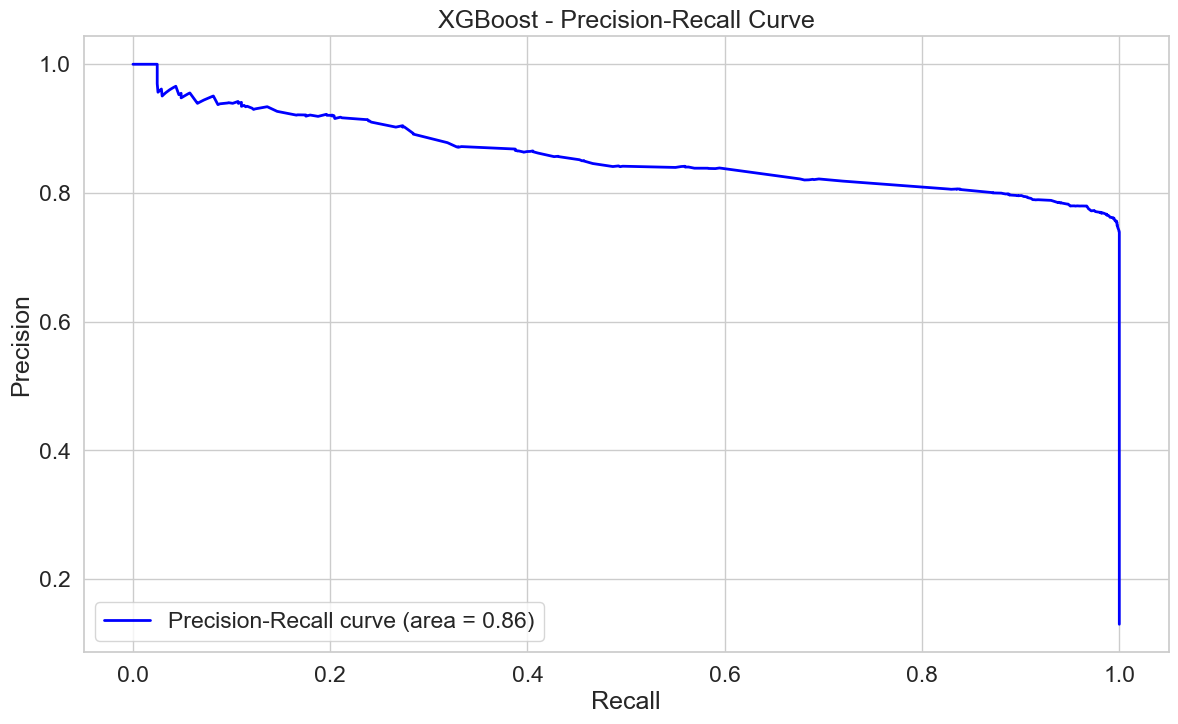

In [16]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores, classifier_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Plot ROC and Precision-Recall curves for each classifier
for name, classifier in classifiers.items():
    # Predict probabilities for the test set
    y_scores = classifier.predict_proba(X_test)[:, 1]  # Get the scores for the positive class

    # Plot ROC curve
    plot_roc_curve(y_test, y_scores, name)

    # Plot Precision-Recall curve
    plot_precision_recall_curve(y_test, y_scores, name)
